# get_universe說明

## Import and Setting

In [1]:
import pandas as pd
import datetime
import tejapi
import os
import numpy as np

# set tej_key and base
tej_key = 'your key'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key
os.environ['TEJAPI_BASE']= api_base

tejapi.ApiConfig.api_key = tej_key  
tejapi.ApiConfig.api_base = api_base

# set date
start='2023-01-01'
end='2023-10-24'

from logbook import Logger, StderrHandler, INFO
log_handler = StderrHandler(format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                            '{record.level_name}: {record.func_name}: {record.message}',
                            level=INFO)
log_handler.push_application()
log = Logger('get_universe')

## get_universe
用來取得特定的股票池（使用此函數會消耗API流量）。

```python
get_universe(start,
             end=datetime.datetime.now().date().strftime('%Y-%m-%d'),
             trading_calendar = get_calendar('TEJ_XTAI'), 
             **kwargs)
```

<!-- <table><tr><td bgcolor=green>Parameters</td></tr></table> -->

### Parameters
---
- **start**(*datetime or str*)－Start date.
- **end**(*datetime or str, optional*)－This defaults to the current date.
- **trading_calendar**(*TradingCalendar, optional*)－設置交易日曆。預設是`get_calendar('TEJ_XTAI')`。
- **kwargs properties（至少需要指定一個）**  
  <br>Here is a list of available properties：</br>   

  - **mkt**(*list or str*)－市場別。
    - valid mkt：`['TWSE', 'OTC']`。
    - 若在**證券交易所**掛牌，註記為「TWSE」；若在**櫃買中心**掛牌，註記為「OTC」。
    - **市場別（mkt）** 與**板塊別（mkt_bd）** 的概念請參考以下說明：[市場別（mkt） 與板塊別（mkt_bd）](#mktandmkt_bd)。
  - **mkt_bd**(*list or str*)－板塊別。
    - valid mkt_bd：`['TSE', 'OTC', 'TIB', 'TWSE']`。
    - 若在**上市一般板**，註記為「TSE」；若在**上市創新板**，註記為「TIB」；若在**上櫃一般板**，註記為「OTC」；若是**指數**，註記為「TWSE」。
  - **stktp_c**(*list or str*)－證券種類(中)。
    - valid stktp_c：`['ETF', '普通股', '特別股', 'TDR', '指數']`。
  - **stktp_e**(*list or str*)－證券種類(英)。
    - valid stktp_e：`['ETF', 'Common Stock', 'Preferred Stock', 'TDR', 'Index']`。
  - **industry_c**(*list or str*)－產業別(中)。
    <details>
    <summary><font color=Blue>點選查看valid industry_c</font>：</summary>
    <pre>
    
    - M1100 水泥工業類指數
    - M1200 食品工業類指數
    - M1300 塑膠工業類指數
    - M1400 紡織纖維類指數
    - M1500 電機機械類指數
    - M1600 電器電纜類指數
    - M1721 化學工業指數
    - M1722 生技醫療指數
    - M1800 玻璃陶瓷類指數
    - M1900 造紙工業類指數
    - M2000 鋼鐵工業類指數
    - M2100 橡膠類指數
    - M2200 汽車工業類指數
    - M2324 半導體業指數
    - M2325 電腦及週邊設備業指數
    - M2326 光電業指數
    - M2327 通信網路業指數
    - M2328 零組件指數
    - M2329 電子通路業指數
    - M2330 資訊服務業指數
    - M2331 其他電子業指數
    - M2335 綠能環保類指數
    - M2336 數位雲端類指數
    - M2500 建材營造類指數
    - M2500 營造建材類指數
    - M2600 航運業類指數
    - M2700 觀光餐旅類指數
    - M2800 金融保險類指數
    - M2900 貿易百貨類指數
    - M3000 証券
    - M3700 運動休閒類指數
    - M3800 居家生活類指數
    - M9700 油電燃氣業指數
    - M9900 其他類指數
    - O1721 OTC 化學工業指數
    - O1722 OTC 生技醫療指數
    - O2324 OTC 半導體業指數
    - O2325 OTC 週邊指數
    - O2326 OTC 光電業指數
    - O2327 OTC 通信網路業指數
    - O2328 OTC 零組指數
    - O2329 OTC 通路業指數
    - O2330 OTC 資訊服務業指數
    - O2331 其他電子
    - O2335 OTC 綠能環保類
    - O2336 OTC 數位雲端類
    - OTC12 OTC 食品類
    - OTC13 OTC 塑膠類
    - OTC14 OTC 紡織纖維類
    - OTC15 OTC 電機機械類
    - OTC16 OTC 電器電纜
    - OTC16 OTC 電纜類
    - OTC18 OTC 玻璃陶瓷類
    - OTC20 OTC 鋼鐵類
    - OTC21 OTC 橡膠類指數
    - OTC25 OTC 營造建材類
    - OTC26 OTC 航運類
    - OTC27 OTC 觀光餐旅類指數
    - OTC28 OTC 金融類
    - OTC29 OTC 百貨類
    - OTC30 OTC 證券類
    - OTC32 文創指數
    - OTC33 OTC 農業科技業指數
    - OTC34 OTC 電子商務
    - OTC37 OTC 運動休閒類
    - OTC38 OTC 居家生活類
    - OTC89 OTC 其它類
    - OTC97 OTC 油電燃氣業   
    
    </pre>
    </details>
    
  - **industry_e**(*list or str*)－產業別(英)。
    <details>
    <summary><font color=Blue>點選查看valid industry_e</font>：</summary>
    <pre>
    
    - M1100 TSE Cement Subindex
    - M1200 TSE Foods Subindex
    - M1300 TSE Plastics Subindex
    - M1400 TSE Textiles Subindex
    - M1500 TSE Elec. Machinery Subindex
    - M1600 TSE Elec. & Cable Subindex
    - M1721 TSE Chemical Subindex
    - M1722 TSE Biotech. & Med. Subindex
    - M1800 TSE Glass & Ceramics Subindex
    - M1900 TSE Paper and Pulp Subindex
    - M2000 TSE Iron and Steel Subindex
    - M2100 TSE Rubber Subindex
    - M2200 TSE Automobile Subindex
    - M2324 TSE Semiconductor Subindex
    - M2325 TSE Computer & Per. Subindex
    - M2326 TSE Optoelectronic Subindex
    - M2327 TSE Comm. Internet Subindex
    - M2328 TSE Elec. Parts Subindex
    - M2329 TSE Elec. Products Subindex
    - M2330 TSE Inf. Service Subindex
    - M2331 TSE Other Electronic Subindex
    - M2335 TSE Green Energy and Environme
    - M2336 TSE Digital and Cloud Services
    - M2500 TSE Building & Cons. Subindex
    - M2600 TSE Shipping & Trans. Subindex
    - M2700 TSE Tourism and Hospitality Su
    - M2800 TSE Finance Subindex
    - M2900 TSE Trading & Cons. Subindex
    - M3000 Securities
    - M3700 TSE Sports and Leisure Subinde
    - M3800 TSE Household Subindex
    - M9700 TSE Oil Gas and Elec Subindex
    - M9900 TSE Others Subindex
    - O1721 OTC Chemicals Subindex
    - O1722 OTC Biotech. & Med. Subindex
    - O2324 OTC Semiconductor Subindex
    - O2325 OTC Computer & Per. Subindex
    - O2326 OTC Optoelectronic Subindex
    - O2327 OTC Comm. Internet Subindex
    - O2328 OTC Elec. Parts Subindex
    - O2329 OTC Elec. Products Subindex
    - O2330 OTC Inf. Service Subindex
    - O2331 Other Electronic Ind. Index
    - O2335 TPEX Green Energy and Environm
    - O2336 TPEX Digital and Cloud Service
    - OTC12 OTC Food Subindex
    - OTC13 OTC Plastic Subindex
    - OTC14 OTC Textile Subindex
    - OTC15 OTC Electronical Subindex
    - OTC16 OTC Wire & Cable Subindex
    - OTC18 OTC Glass Subindex
    - OTC20 OTC Steel Subindex
    - OTC21 OTC Rubber Subindex
    - OTC25 OTC Construction Subindex
    - OTC26 OTC Transportation Subindex
    - OTC27 OTC Tourism Subindex
    - OTC28 OTC Banking Subindex
    - OTC29 OTC Retailing
    - OTC30 OTC Securities Subindex
    - OTC32 C & C Industry Index
    - OTC33 OTC Agr. & Tech. Subindex
    - OTC34 OTC E-commerce
    - OTC37 OTC Sports and Leisure Subinde
    - OTC38 TPEX Household Industry Index
    - OTC89 OTC Others Subindex
    - OTC97 OTC Gas & Elec.
 
    </pre>
    </details>
        
  - **idx_id**(*list or str*)－指數名稱。
    
    <details>
    <summary><font color=Blue>點選查看valid idx_id</font>：</summary>
    <pre> 
    
    - IX0001	加權指數
    - IX0002	台灣50指數
    - IX0003	台灣中型指數
    - IX0006	台灣高股息指數
    - IX0010	水泥工業類指數
    - IX0011	食品工業類指數
    - IX0012	塑膠工業類指數
    - IX0016	紡織纖維類指數
    - IX0017	電機機械類指數
    - IX0018	電器電纜類指數
    - IX0019	化學生技醫療類指數
    - IX0020	化學工業指數
    - IX0021	生技醫療指數
    - IX0022	玻璃陶瓷類指數
    - IX0023	造紙工業類指數
    - IX0024	鋼鐵工業類指數
    - IX0025	橡膠類指數
    - IX0026	汽車工業類指數
    - IX0027	電子類指數
    - IX0028	半導體業指數
    - IX0029	電腦及週邊設備業指數
    - IX0030	光電業指數
    - IX0031	通信網路業指數
    - IX0032	電子零組件業指數
    - IX0033	電子通路業指數
    - IX0034	資訊服務業指數
    - IX0035	其他電子業指數
    - IX0036	建材營造類指數
    - IX0037	航運業類指數
    - IX0038	觀光事業類指數
    - IX0039	金融保險類指數
    - IX0040	貿易百貨類指數
    - IX0041	油電燃氣業指數
    - IX0042	其他類指數
    - IX0043	OTC 指數
    - IX0044	OTC 紡織纖維類
    - IX0045	OTC 電機機械類
    - IX0046	OTC 鋼鐵類
    - IX0047	OTC 電子類
    - IX0048	OTC 營造建材類
    - IX0049	OTC 航運類
    - IX0050	OTC 觀光類指數
    - IX0051	OTC 化學工業指數
    - IX0052	OTC 生技醫療指數
    - IX0053	OTC 半導體業指數
    - IX0054	OTC 電腦及週邊設備業指數
    - IX0055	OTC 光電業指數
    - IX0056	OTC 通信網路業指數
    - IX0057	OTC 電子零組件指數
    - IX0058	OTC 電子通路業指數
    - IX0059	OTC 資訊服務業指數
    - IX0060	富櫃五十指數
    - IX0063	線上遊戲指數
    - IX0075	文化創意業指數
    - IX0082	臺灣證券交易所公司治理100 指數
    - IX0085	櫃買治理
    - IX0099	其他電子業指數
    - IX0118	櫃買富櫃200指數

    </pre>
    </details>
    
### Returns
---
List of symbols.

### Return type
---
*list*

<span id="mktandmkt_bd"></span>
## 市場別（mkt） 與板塊別（mkt_bd）
---
以普通股為例：

- **普通股（stktp_c='普通股'）**：包含在**證券交易所（mkt='TWSE'）掛牌的普通股** 與在**櫃買中心（mkt='OTC'）掛牌的普通股**。
  - 在**證券交易所掛牌的普通股**：包含**上市一般板（mkt_bd='TSE'）** 與 **上市創新板（mkt_bd='TIB'）**。
  - 在**櫃買中心掛牌的普通股**：包含**上櫃一般板（mkt_bd='OTC'）**，不含興櫃。

- 統整上述關係：
> 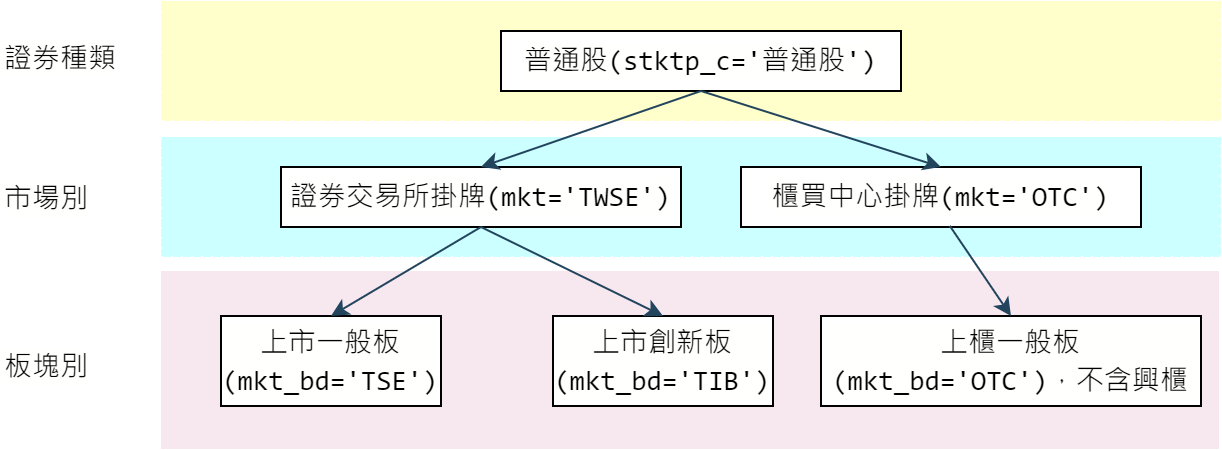

## Import get_universe

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

<span id="menu"></span>
## Examples

包含以下八個範例：
1. [case1 取曾經在上市一般板+上櫃一般板的證券](#case1)
2. [case2 取曾經在證券交易所掛牌的證券](#case2)
3. [case3 取曾經上市+上櫃的普通股](#case3)
4. [case4 取產業別曾經為"M2324 半導體業指數"的證券](#case4)
5. [case5 取產業別曾經為"M1600 TSE Elec. & Cable Subindex"&"M1722 TSE Biotech. & Med. Subindex"的證券](#case5)
6. [case6 取證券種類為"ETF"及"普通股"且掛牌於證券交易所的證券](#case6)
7. [case7 取曾經為"IX0002"（台灣50指數）成份股的證券](#case7)
8. [case8 取產業別曾經為"M2324 半導體業指數"且為"IX0006"（台灣高股息指數）成份股的證券](#case8)

<span id="case1"></span>
### case1 取曾經在上市一般板+上櫃一般板的證券（不限於普通股）

這樣的使用方式不會取出`mkt_bd`=TIB（創新板）的證券

[Return to Examples Menu](#menu)

In [3]:
get_universe(start, end, mkt_bd=['TSE','OTC'])

[2023-11-01 05:42:18.623011]: INFO: get_universe_TW: Filters：{'mkt_bd': ['TSE', 'OTC']}


['0050',
 '0051',
 '0052',
 '0053',
 '0055',
 '0056',
 '0057',
 '0061',
 '006201',
 '006203',
 '006204',
 '006205',
 '006206',
 '006207',
 '006208',
 '00625K',
 '00631L',
 '00632R',
 '00633L',
 '00634R',
 '00635U',
 '00636',
 '00636K',
 '00637L',
 '00638R',
 '00639',
 '00640L',
 '00641R',
 '00642U',
 '00643',
 '00643K',
 '00645',
 '00646',
 '00647L',
 '00648R',
 '00650L',
 '00651R',
 '00652',
 '00653L',
 '00654R',
 '00655L',
 '00656R',
 '00657',
 '00657K',
 '00660',
 '00661',
 '00662',
 '00663L',
 '00664R',
 '00665L',
 '00666R',
 '00668',
 '00668K',
 '00669R',
 '00670L',
 '00671R',
 '00673R',
 '00674R',
 '00675L',
 '00676R',
 '00678',
 '00679B',
 '00680L',
 '00681R',
 '00682U',
 '00683L',
 '00684R',
 '00685L',
 '00686R',
 '00687B',
 '00688L',
 '00689R',
 '00690',
 '00692',
 '00693U',
 '00694B',
 '00695B',
 '00696B',
 '00697B',
 '00700',
 '00701',
 '00702',
 '00703',
 '00706L',
 '00707R',
 '00708L',
 '00709',
 '00710B',
 '00711B',
 '00712',
 '00713',
 '00714',
 '00715L',
 '00717',
 '007

<span id="case2"></span>
### case2 取曾經在證券交易所／櫃買中心掛牌的證券（不限於普通股）
[Return to Examples Menu](#menu)

#### 取曾經在證券交易所掛牌的證券

In [4]:
get_universe(start, end, mkt=['TWSE'])

[2023-11-01 05:42:22.245781]: INFO: get_universe_TW: Filters：{'mkt': ['TWSE']}


['0050',
 '0051',
 '0052',
 '0053',
 '0055',
 '0056',
 '0057',
 '0061',
 '006203',
 '006204',
 '006205',
 '006206',
 '006207',
 '006208',
 '00625K',
 '00631L',
 '00632R',
 '00633L',
 '00634R',
 '00635U',
 '00636',
 '00636K',
 '00637L',
 '00638R',
 '00639',
 '00640L',
 '00641R',
 '00642U',
 '00643',
 '00643K',
 '00645',
 '00646',
 '00647L',
 '00648R',
 '00650L',
 '00651R',
 '00652',
 '00653L',
 '00654R',
 '00655L',
 '00656R',
 '00657',
 '00657K',
 '00660',
 '00661',
 '00662',
 '00663L',
 '00664R',
 '00665L',
 '00666R',
 '00668',
 '00668K',
 '00669R',
 '00670L',
 '00671R',
 '00673R',
 '00674R',
 '00675L',
 '00676R',
 '00678',
 '00680L',
 '00681R',
 '00682U',
 '00683L',
 '00684R',
 '00685L',
 '00686R',
 '00688L',
 '00689R',
 '00690',
 '00692',
 '00693U',
 '00700',
 '00701',
 '00702',
 '00703',
 '00706L',
 '00707R',
 '00708L',
 '00709',
 '00710B',
 '00711B',
 '00712',
 '00713',
 '00714',
 '00715L',
 '00717',
 '00728',
 '00730',
 '00731',
 '00732',
 '00733',
 '00735',
 '00736',
 '00737',
 '

#### 取曾經在櫃買中心掛牌的證券

In [5]:
get_universe(start, end, mkt=['OTC'])

[2023-11-01 05:42:25.296933]: INFO: get_universe_TW: Filters：{'mkt': ['OTC']}


['006201',
 '00679B',
 '00687B',
 '00694B',
 '00695B',
 '00696B',
 '00697B',
 '00718B',
 '00719B',
 '00720B',
 '00721B',
 '00722B',
 '00723B',
 '00724B',
 '00725B',
 '00726B',
 '00727B',
 '00734B',
 '00740B',
 '00741B',
 '00744B',
 '00746B',
 '00748B',
 '00749B',
 '00750B',
 '00751B',
 '00754B',
 '00755B',
 '00756B',
 '00758B',
 '00759B',
 '00760B',
 '00761B',
 '00764B',
 '00765B',
 '00768B',
 '00772B',
 '00773B',
 '00777B',
 '00778B',
 '00779B',
 '00780B',
 '00781B',
 '00782B',
 '00784B',
 '00785B',
 '00786B',
 '00787B',
 '00788B',
 '00789B',
 '00790B',
 '00791B',
 '00792B',
 '00793B',
 '00794B',
 '00795B',
 '00799B',
 '00831B',
 '00834B',
 '00836B',
 '00840B',
 '00841B',
 '00842B',
 '00844B',
 '00845B',
 '00846B',
 '00847B',
 '00848B',
 '00849B',
 '00853B',
 '00856B',
 '00857B',
 '00858',
 '00859B',
 '00860B',
 '00862B',
 '00863B',
 '00864B',
 '00867B',
 '00870B',
 '00877',
 '00883B',
 '00884B',
 '00886',
 '00887',
 '00888',
 '00890B',
 '00928',
 '00931B',
 '00933B',
 '1240',
 '1258'

<span id="case3"></span>
### case3 取曾經上市+上櫃的普通股

- case1與case2取出的證券**不限於普通股**，若**僅想取出普通股**，則可以新增`stktp_c=['普通股']`的條件。
  

- 以下兩種方式皆能取得曾經上市+上櫃的普通股：
  - `get_universe(start, end, mkt=['TWSE','OTC'], stktp_c=['普通股'])`
  - `get_universe(start, end, mkt_bd=['TSE','OTC','TIB'],mkt=['TWSE','OTC'], stktp_c=['普通股'])`
  
  

- 若需要排除**上市創新板（mkt_bd='TIB'）** 的普通股，可使用：
  - `get_universe(start, end, mkt_bd=['TSE','OTC'],mkt=['TWSE','OTC'], stktp_c=['普通股'])`

[Return to Examples Menu](#menu)

In [7]:
get_universe(start, end, mkt=['TWSE','OTC'], stktp_c=['普通股'])

[2023-11-01 05:42:31.245778]: INFO: get_universe_TW: Filters：{'mkt': ['TWSE', 'OTC'], 'stktp_c': ['普通股']}


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1240',
 '1256',
 '1258',
 '1259',
 '1264',
 '1268',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1336',
 '1337',
 '1338',
 '1339',
 '1340',
 '1341',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1512',
 

In [6]:
get_universe(start, end, mkt_bd=['TSE','OTC','TIB'], mkt=['TWSE','OTC'], stktp_c=['普通股'])

[2023-11-01 05:42:28.315555]: INFO: get_universe_TW: Filters：{'mkt_bd': ['TSE', 'OTC', 'TIB'], 'mkt': ['TWSE', 'OTC'], 'stktp_c': ['普通股']}


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1240',
 '1256',
 '1258',
 '1259',
 '1264',
 '1268',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1336',
 '1337',
 '1338',
 '1339',
 '1340',
 '1341',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1512',
 

<span id="case4"></span>
### case4 取產業別曾經為"M2324 半導體業指數"的證券
[Return to Examples Menu](#menu)

In [8]:
get_universe(start, end, industry_c=['M2324 半導體業指數'])

[2023-11-01 05:42:34.261552]: INFO: get_universe_TW: Filters：{'industry_c': ['M2324 半導體業指數']}


['2302',
 '2303',
 '2329',
 '2330',
 '2337',
 '2338',
 '2342',
 '2344',
 '2351',
 '2363',
 '2369',
 '2379',
 '2388',
 '2401',
 '2408',
 '2434',
 '2436',
 '2441',
 '2449',
 '2451',
 '2454',
 '2458',
 '2481',
 '3006',
 '3014',
 '3016',
 '3034',
 '3035',
 '3041',
 '3054',
 '3094',
 '3189',
 '3257',
 '3413',
 '3443',
 '3450',
 '3530',
 '3532',
 '3536',
 '3545',
 '3583',
 '3588',
 '3592',
 '3661',
 '3686',
 '3711',
 '4919',
 '4952',
 '4961',
 '4967',
 '4968',
 '5222',
 '5269',
 '5285',
 '5471',
 '6202',
 '6239',
 '6243',
 '6257',
 '6271',
 '6415',
 '6451',
 '6515',
 '6525',
 '6526',
 '6531',
 '6533',
 '6552',
 '6573',
 '6695',
 '6719',
 '6756',
 '6770',
 '6789',
 '6799',
 '8016',
 '8028',
 '8081',
 '8110',
 '8131',
 '8150',
 '8261',
 '8271']

<span id="case5"></span>
          
### case5 取產業別曾經為"M1600 TSE Elec. & Cable Subindex"&"M1722 TSE Biotech. & Med. Subindex"的證券
[Return to Examples Menu](#menu)

In [9]:
get_universe(start, end, industry_e=['M1600 TSE Elec. & Cable Subindex',
                                     'M1722 TSE Biotech. & Med. Subindex'])

[2023-11-01 05:42:36.625601]: INFO: get_universe_TW: Filters：{'industry_e': ['M1600 TSE Elec. & Cable Subindex', 'M1722 TSE Biotech. & Med. Subindex']}


['1598',
 '1603',
 '1604',
 '1605',
 '1608',
 '1609',
 '1611',
 '1612',
 '1614',
 '1615',
 '1616',
 '1617',
 '1618',
 '1626',
 '1701',
 '1707',
 '1720',
 '1731',
 '1733',
 '1734',
 '1736',
 '1752',
 '1760',
 '1762',
 '1783',
 '1786',
 '1789',
 '1795',
 '3164',
 '3705',
 '4104',
 '4106',
 '4108',
 '4119',
 '4133',
 '4137',
 '4142',
 '4148',
 '4155',
 '4164',
 '4190',
 '4737',
 '4746',
 '4930',
 '5283',
 '6431',
 '6491',
 '6541',
 '6550',
 '6598',
 '6657',
 '6666',
 '6782',
 '6796',
 '6861']

<span id="case6"></span>
### case6 取證券種類為"ETF"及"普通股"且掛牌於證券交易所的證券
[Return to Examples Menu](#menu)

In [10]:
get_universe(start, end, stktp_c=['ETF', '普通股'], mkt=['TWSE'])

[2023-11-01 05:42:38.959265]: INFO: get_universe_TW: Filters：{'stktp_c': ['ETF', '普通股'], 'mkt': ['TWSE']}


['0050',
 '0051',
 '0052',
 '0053',
 '0055',
 '0056',
 '0057',
 '0061',
 '006203',
 '006204',
 '006205',
 '006206',
 '006207',
 '006208',
 '00625K',
 '00631L',
 '00632R',
 '00633L',
 '00634R',
 '00635U',
 '00636',
 '00636K',
 '00637L',
 '00638R',
 '00639',
 '00640L',
 '00641R',
 '00642U',
 '00643',
 '00643K',
 '00645',
 '00646',
 '00647L',
 '00648R',
 '00650L',
 '00651R',
 '00652',
 '00653L',
 '00654R',
 '00655L',
 '00656R',
 '00657',
 '00657K',
 '00660',
 '00661',
 '00662',
 '00663L',
 '00664R',
 '00665L',
 '00666R',
 '00668',
 '00668K',
 '00669R',
 '00670L',
 '00671R',
 '00673R',
 '00674R',
 '00675L',
 '00676R',
 '00678',
 '00680L',
 '00681R',
 '00682U',
 '00683L',
 '00684R',
 '00685L',
 '00686R',
 '00688L',
 '00689R',
 '00690',
 '00692',
 '00693U',
 '00700',
 '00701',
 '00702',
 '00703',
 '00706L',
 '00707R',
 '00708L',
 '00709',
 '00710B',
 '00711B',
 '00712',
 '00713',
 '00714',
 '00715L',
 '00717',
 '00728',
 '00730',
 '00731',
 '00732',
 '00733',
 '00735',
 '00736',
 '00737',
 '

<span id="case7"></span>
### case7 取曾經為"IX0002"（台灣50指數）成份股的證券
[Return to Examples Menu](#menu)

In [11]:
get_universe(start, end, idx_id='IX0002')

[2023-11-01 05:42:41.563506]: INFO: get_universe_TW: Filters：{'idx_id': ['IX0002']}


['1101',
 '1216',
 '1301',
 '1303',
 '1326',
 '1402',
 '1590',
 '1605',
 '2002',
 '2207',
 '2301',
 '2303',
 '2308',
 '2317',
 '2327',
 '2330',
 '2345',
 '2357',
 '2379',
 '2382',
 '2395',
 '2408',
 '2412',
 '2454',
 '2603',
 '2609',
 '2615',
 '2801',
 '2880',
 '2881',
 '2882',
 '2883',
 '2884',
 '2885',
 '2886',
 '2887',
 '2890',
 '2891',
 '2892',
 '2912',
 '3008',
 '3034',
 '3037',
 '3045',
 '3231',
 '3711',
 '4904',
 '4938',
 '5871',
 '5876',
 '5880',
 '6415',
 '6505',
 '6669',
 '8046',
 '9910']

<span id="case8"></span>
### case8 取產業別曾經為"M2324 半導體業指數"且為"IX0006"（台灣高股息指數）成份股的證券
[Return to Examples Menu](#menu)

In [12]:
get_universe(start, end, industry_c='M2324 半導體業指數', idx_id='IX0006')

[2023-11-01 05:42:41.742667]: INFO: get_universe_TW: Filters：{'industry_c': 'M2324 半導體業指數', 'idx_id': ['IX0006']}


['2303',
 '2337',
 '2379',
 '2449',
 '2454',
 '3034',
 '3189',
 '3711',
 '6239',
 '6271']